In [1]:
#Online shopping Customer Segmentation
#**Problem statement**

# 1: Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary) 
# 2: Segment (Group/Cluster) Identify trends for Day, Month, Season, Time by Invoice count
# 3.Top 10 selling product 
# 4 Best product at country level.
# 5 FINDING CUSTOMER VALUATION.

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [14]:
df=pd.read_excel("Online_shopping.xlsx")
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df.shape

(541909, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [7]:
# 1- Total 8 feature and this one is clustering problem so no target variable column is there.Data set consists of 541909 rows
# 2- InvoiceDate column is already in datetime format
# 3- Has null values in few features as well
# 4- In cistomerID coloum we have null values.

In [17]:
df.isnull().sum()/len(df1)*100

InvoiceNo       0.000000
StockCode       0.000000
lower          99.664888
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [18]:
df.duplicated().sum() # Ignoring duplicates

5268

In [19]:
df1=df.copy()

In [20]:
df1=df1.dropna(subset=['CustomerID'])

In [21]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
lower          405387
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
dtype: int64

# 1: Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary) 

In [22]:
# Droping columns are insignificant for customer segmentation
df2 = df1.drop(['StockCode','Description', 'Country','lower'], axis = 1)
df2.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [12]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00000,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08000,4.13,38970.0
CustomerID,541909.0,15287.690570,1484.746010,12346.00,14367.00,15287.69057,16255.00,18287.0


In [13]:
#From descriptive statistics we can see that some of the order in quantity column are negative quantity.
#It occurs when customer returns the defective product.
# For total Sale we have to multiply 'Quantity' with 'UnitPrice'
# In two ways we can handle negative quantity entries
#1- Replace the negative quanity by 0 also so that total sale amount will be 0 for that entry
#2- Leave the negative quantity as it is so that total sale will -ve and it will cancel out the +ve sale of that item to balance out

# But at least customer came and buy something so we need to count that sale amount so lets fill -ve qty by 0

In [23]:
df2=df2[(df2["Quantity"]>0)]

In [24]:
df2.shape
# By removing negative and 0 quantity items we have reduced 10624 rows but considered the sales done.

(397924, 5)

In [25]:
#Creating another column by calculating Total Sale (Sale= Qty x UnitPrice)
df2["Total"]=df2["Quantity"]*df2["UnitPrice"]
df2.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [26]:
#Now we can drop 'Quantity','UnitPrice' feature as well so lets drop and create another data set
RFMScore=df2[['CustomerID','InvoiceNo','InvoiceDate','Total']]

In [27]:
RFMScore.head()

,CustomerID,InvoiceNo,InvoiceDate,Total
0,17850.0,536365,2010-12-01 08:26:00,15.30
1,17850.0,536365,2010-12-01 08:26:00,20.34
2,17850.0,536365,2010-12-01 08:26:00,22.00
3,17850.0,536365,2010-12-01 08:26:00,20.34
4,17850.0,536365,2010-12-01 08:26:00,20.34


In [28]:
#For every item there is different entry for same invoice number 
#so to get total sale we have to add total of same invoice-We can apply gropuby and sum function to get total sale of an Invoice
RFMScore=RFMScore.groupby(['InvoiceNo','InvoiceDate','CustomerID']).agg({'Total':'sum'}).reset_index()
RFMScore.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [29]:
RFMScore.shape

(18566, 4)

# Customer Classification on basis of Recency, Frequency, Monetary - 

1.Recency- How recently visited

2.Frequency-Total how many times visited

3.Monetary- Total amount spend in visit

In [30]:
# check the latest date or last date of dataset
max(RFMScore["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [31]:
# check the starting date of dataset
min(RFMScore["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

From start date and last date we can conclude that this datset is for 1 year (Dec 2010 to Dec 2011)

In [32]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

 By keeping reference as customer id -

1.Recency- Difference between last invoice date and the latest date- From 'InvoiceDate' column

2.Frequency- Counts of invoice no. - From 'InvoiceNo' column

3.Monetary-  Sum of total.- From 'Total' column


 Now we shall compute -
(a) Recency:-the number of days between the present date and the date of last purchase from each customer.

(b) Frequency:-the number of order for each customer

(c) Monetary:-the sum of purchase price for each customer.


In [33]:
# Using dictionary format in agg function to apply column wise :
RFMScore=RFMScore.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                             "InvoiceNo":lambda x:x.count(),
                                             "Total":lambda x:x.sum()}).reset_index()

In [34]:
RFMScore.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [51]:
# rename the columns 
RFMScore=RFMScore.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})

In [52]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


Now we have to set benchmark for R,F,M to assign scores so that segmentation can be done as per total score.
The benchmark can be based on percentile so lets see the five point summary of RFM score data

In [36]:
RFMScore.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.041484,4.278866,2053.793018
std,1721.889758,100.007757,7.727621,8988.248381
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.500000,17.000000,1.000000,307.245000
50%,15299.000000,50.000000,2.000000,674.450000
75%,16778.500000,141.500000,5.000000,1661.640000
max,18287.000000,373.000000,211.000000,280206.020000


<AxesSubplot:xlabel='Recency', ylabel='Proportion'>

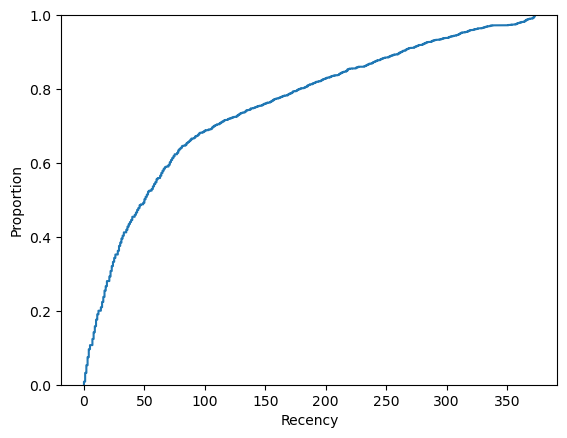

In [29]:
sns.ecdfplot(data=RFMScore['Recency'])

<AxesSubplot:xlabel='Frequency', ylabel='Proportion'>

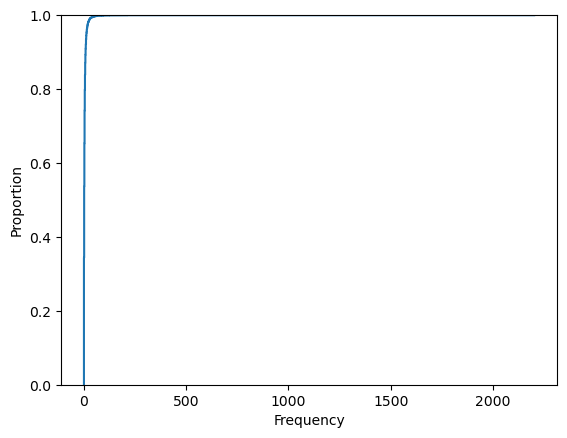

In [30]:
sns.ecdfplot(data=RFMScore['Frequency'])

<AxesSubplot:xlabel='Monetary', ylabel='Proportion'>

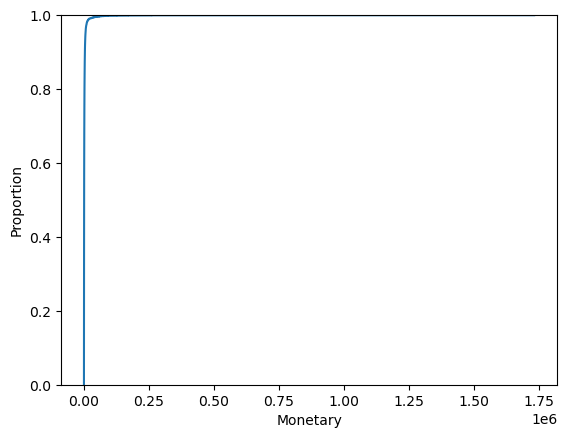

In [31]:
sns.ecdfplot(data=RFMScore['Monetary'])

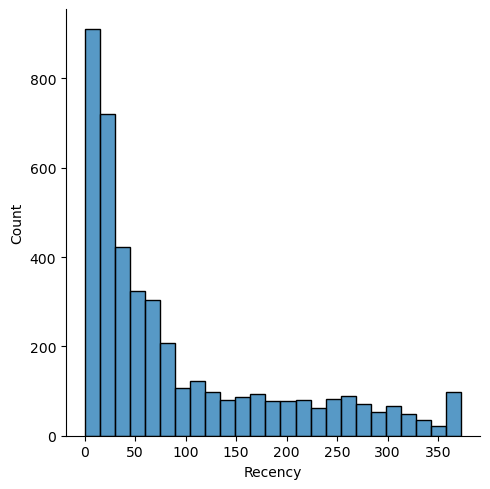

In [32]:
sns.displot(x=RFMScore['Recency'])

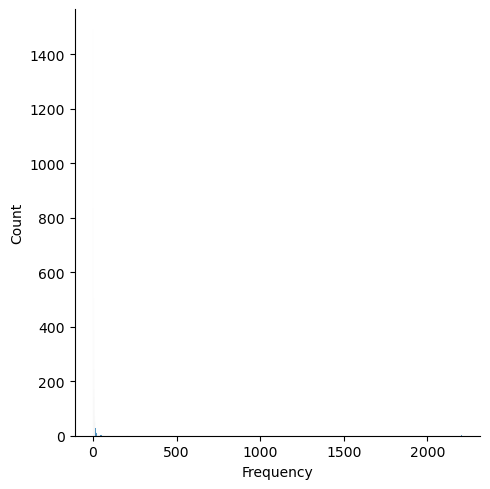

In [33]:
sns.displot(x=RFMScore['Frequency'])

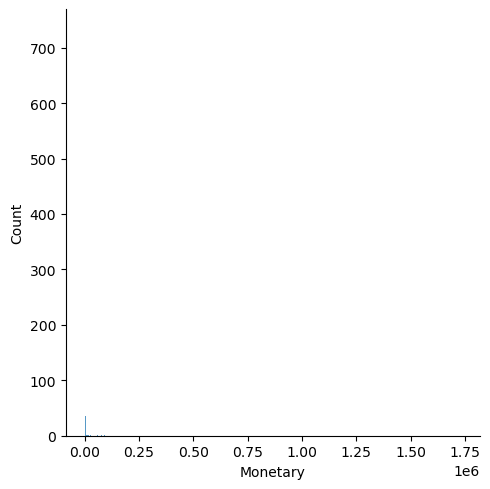

In [34]:
sns.displot(x=RFMScore['Monetary'])

In [37]:
RFMScore['Recency'].quantile(q=[0.39,0.50,0.75])

0.39     31.0
0.50     50.0
0.75    141.5
Name: Recency, dtype: float64

In [38]:
RFMScore['Frequency'].quantile(q=[0.75,0.95,0.99])

0.75     5.0
0.95    13.0
0.99    30.0
Name: Frequency, dtype: float64

In [39]:
RFMScore['Monetary'].quantile(q=[0.75,0.95,0.99])

0.75     1661.6400
0.95     5840.1820
0.99    19880.0918
Name: Monetary, dtype: float64

In [38]:
RFMScore.describe()

,CustomerID,Recency,Frequency,Monetary
count,4340.000000,4340.000000,4340.000000,4.340000e+03
mean,15299.934030,92.020276,4.785714,2.452664e+03
std,1721.691336,100.005992,34.272832,2.777147e+04
min,12346.000000,0.000000,1.000000,0.000000e+00
25%,13812.750000,17.000000,1.000000,3.073225e+02
50%,15298.500000,50.000000,2.000000,6.744850e+02
75%,16778.250000,141.250000,5.000000,1.661950e+03
max,18287.000000,373.000000,2204.000000,1.733153e+06


In [53]:
quantile100=RFMScore.quantile(q=[0.39,0.56,0.72])#Recency
quantile200=RFMScore.quantile(q=[0.75,0.94,0.977,0.995])#Frequency
quantile300=RFMScore.quantile(q=[0.62,0.80,0.938,0.9915,0.9985])#Monetary

In [46]:
quantile100  #so quantile100 is a DataFrame

,CustomerID,Recency,Frequency,Monetary
0.39,14648.64,31.00,2.0,472.7968
0.56,15652.28,63.00,3.0,813.6544
0.72,16610.36,120.36,4.0,1472.1016


# Function for R,F,M scoring

In [54]:
# less the recency, higher the scoring
# x=Recency/Frequency/Monetary value; 
# d,p= the quantile dataframe no. of row,no. of column

def RScoring(x,d,p):
    if x<=d[p][0.39]:
        return 4
    elif x<=d[p][0.56]:
        return 3
    elif x<=d[p][0.72]:
        return 2
    else:
        return 1
    

In [55]:
# Less the frequency, lesser the scoring
def FScoring(x,d,p):
    if x<=d[p][0.75]:
        return 1
    elif x<=d[p][0.94]:
        return 2
    elif x<=d[p][0.977]:
        return 3
    elif x<=d[p][0.995]:
        return 4
    else:
        return 5
    

In [56]:
# Less the monetary, lesser the scoring
def MScoring(x,d,p):
    if x<=d[p][0.62]:
        return 1
    elif x<=d[p][0.80]:
        return 2
    elif x<=d[p][0.938]:
        return 3
    elif x<=d[p][0.9915]:
        return 4
    else:
        return 5
 

Calculating RFM score of each customer by applying respective score function

In [59]:
RFMScore["R"]=RFMScore["Recency"].apply(RScoring,args=(quantile100,"Recency"))   
RFMScore["F"]=RFMScore["Frequency"].apply(FScoring,args=(quantile200,"Frequency"))
RFMScore["M"]=RFMScore["Monetary"].apply(MScoring,args=(quantile300,"Monetary"))

Function arguments for RScoring: x-RFMScore["Recency"] ;  d - dataframe of RScoring ; p - "Recency" column

In [60]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,1,1,5
1,12347.0,2,7,4310.00,4,2,3
2,12348.0,75,4,1797.24,2,1,2
3,12349.0,18,1,1757.55,4,1,2
4,12350.0,310,1,334.40,1,1,1


In [61]:
#Finding sum of R,F,M Score
RFMScore["RFM_sum"]=RFMScore[["R","F","M"]].sum(axis=1)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum
0,12346.0,325,1,77183.60,1,1,5,7
1,12347.0,2,7,4310.00,4,2,3,9
2,12348.0,75,4,1797.24,2,1,2,5
3,12349.0,18,1,1757.55,4,1,2,7
4,12350.0,310,1,334.40,1,1,1,3


In [62]:
RFMScore.RFM_sum.value_counts() #Customer segmentation can be done for 3 to 14 RFM_sum

RFM_sum
3     1056
6      888
5      613
4      557
7      379
8      284
9      276
10     117
11      80
12      59
14      17
13      13
Name: count, dtype: int64

In [63]:
#Doing segmentation by assigning loyality type to each customer
loyality_label=["Silver","Gold","Diamond","Platinum"]  # 0-4 silver, 5-6 Gold, 7-10 Diamond, 10+ Platinum
RFMScore["RFM_sum"].quantile(q=[0.25,0.70,0.95])

0.25     4.0
0.70     6.0
0.95    10.0
Name: RFM_sum, dtype: float64

In [64]:
quantile500=RFMScore["RFM_sum"].quantile(q=[0.25,0.70,0.95])
def loyality(x,d,p):
    if x<=4:
        return 'Silver'
    elif x<=6:
        return 'Gold'
    elif x<=10:
        return 'Diamond'
    else:
        return 'Platinum'

In [65]:
RFMScore["RFM_loyality"]=RFMScore["RFM_sum"].apply(loyality,args=(quantile500,"RFM_sum")) 

In [66]:
RFMScore["RFM_loyality"].value_counts()

RFM_loyality
Silver      1613
Gold        1501
Diamond     1056
Platinum     169
Name: count, dtype: int64

We can also apply qcut function to divide into 4 equal parts
score_cuts=pd.qcut(RFMScore.RFM_sum,q=4,labels=loyality_label)
RFMScore["RFM_loyality"]=score_cuts.values

In [52]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality
0,12346.0,325,1,77183.60,1,1,5,7,Diamond
1,12347.0,2,7,4310.00,4,2,3,9,Diamond
2,12348.0,75,4,1797.24,2,1,2,5,Gold
3,12349.0,18,1,1757.55,4,1,2,7,Diamond
4,12350.0,310,1,334.40,1,1,1,3,Silver


<AxesSubplot:xlabel='Frequency', ylabel='RFM_sum'>

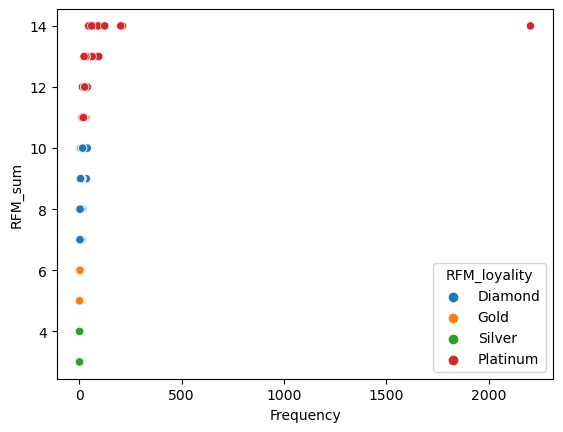

In [53]:
#Visualization 
sns.scatterplot(data=RFMScore,x="Frequency",y="RFM_sum",hue="RFM_loyality")

<AxesSubplot:xlabel='Monetary', ylabel='RFM_sum'>

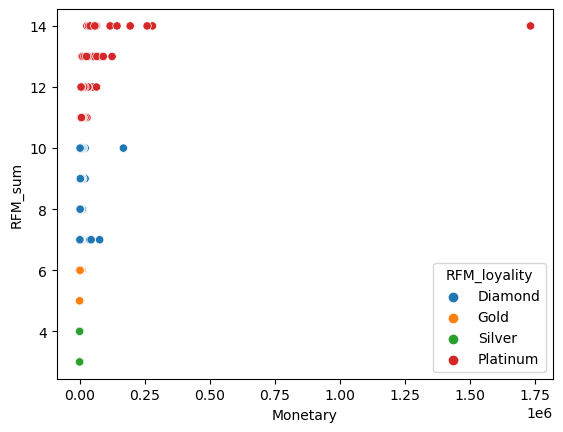

In [54]:
sns.scatterplot(data=RFMScore,x="Monetary",y="RFM_sum",hue="RFM_loyality")

<AxesSubplot:xlabel='Recency', ylabel='RFM_sum'>

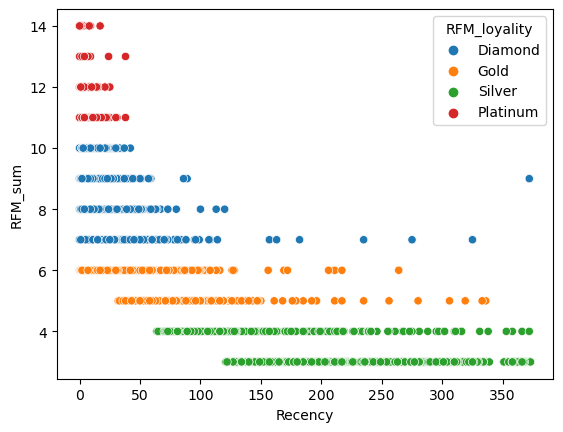

In [55]:
sns.scatterplot(data=RFMScore,x="Recency",y="RFM_sum",hue="RFM_loyality")

In [56]:
#Creating RFM_id by combining R,F,M score instead of adding

In [57]:
RFMScore["RFM_ID"]=RFMScore.R.map(str)+RFMScore.F.map(str)+RFMScore.M.map(str)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,115
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,423
2,12348.0,75,4,1797.24,2,1,2,5,Gold,212
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,412
4,12350.0,310,1,334.40,1,1,1,3,Silver,111


Customer Segment descriptions:
1. Inactive or Passerby customers - Customers who are not after anything in particular. only buy what might catch their attention.
2. Promising or Loyal customers - Customers who shop regularly and love this shopping mall
3. New customers - Customers who enjoy their last visit to shop and may come back if they find out more about what this mall has to offer
4. Out-of-town customers or sleeping - They were once loyal customers, but they move to new place and find a closer shopping mall
5. Students - Customers who visit the store often but they dont spend much
6. Can't loose or Dissatisfied customers - They spend a lot on shopping, but the previous purchase didnt suit them
7. Nurture or Soon-to-be loyal customers - They are 'soon-to-be' loyal customers if the previous purchase suited them and the mall catches their attention

In [58]:
#regex for customer segmentation by using RFM ID
seg_map={
    r'[1][1-2][2-3]':"Inactive or Passerby customers ",
    r'[1-2][1-3][3]':"at-Risk",
    r'[1-2][1-5][3-5]':"cant_lose",
    r'[1][1-4][2-4]':"about_to_sleep",
    r'[3][3][3]':"need_attention",
    r'[3-5][3-5][3-5]':"promising",
    r'[1-2][1-5][1-2]':"new customer",
    r'[3-5][[1-5][1-2]':'students',
    r'[3-5][[1-3][1-2]':'Nurture',
    r'[3-5][[1-2][3-5]': 'Drive_Loyality',
    }

RFMScore["Segment"]=RFMScore["RFM_ID"].replace(seg_map,regex=True)
RFMScore['Segment'].value_counts()


students                           1709
new customer                       1655
Drive_Loyality                      515
promising                           229
Inactive or Passerby customers      144
at-Risk                              67
cant_lose                            19
need_attention                        2
Name: Segment, dtype: int64

In [59]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID,Segment
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,115,cant_lose
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,423,Drive_Loyality
2,12348.0,75,4,1797.24,2,1,2,5,Gold,212,new customer
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,412,students
4,12350.0,310,1,334.40,1,1,1,3,Silver,111,new customer


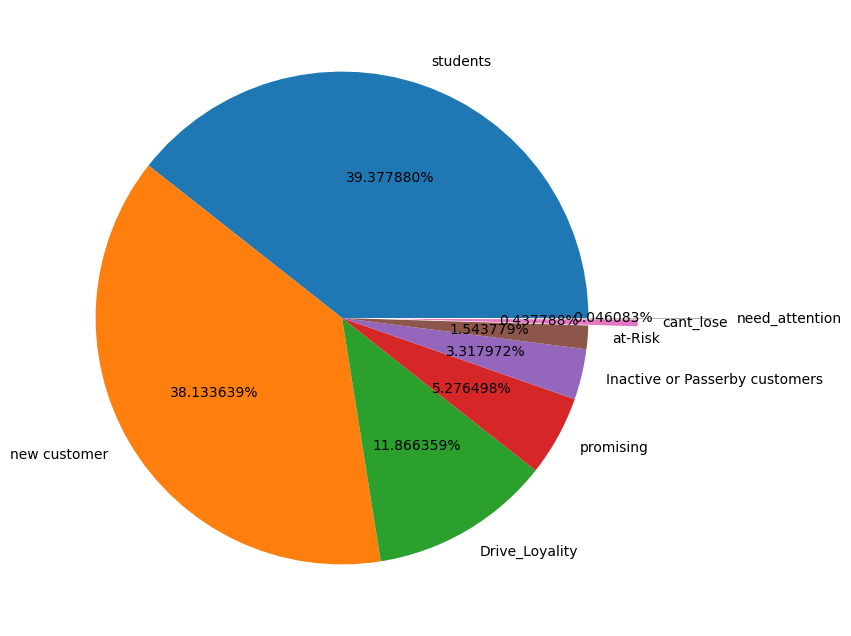

In [60]:
plt.figure(figsize=(14,8))
plt.pie(RFMScore.Segment.value_counts(),explode=(0,0,0,0,0,0,0.2,0.5),labels=RFMScore.Segment.value_counts().index,autopct="%2f%%")
plt.show()

In [61]:
#Using KMeans Algorithm 
Newdata=RFMScore["RFM_sum"]
Newdata
pd.DataFrame(Newdata)

,RFM_sum
0,7
1,9
2,5
3,7
4,3
...,...
4335,3
4336,3
4337,6
4338,10


Finding the appropriate cluster number by applying the k-means algorithm- Elbow Method

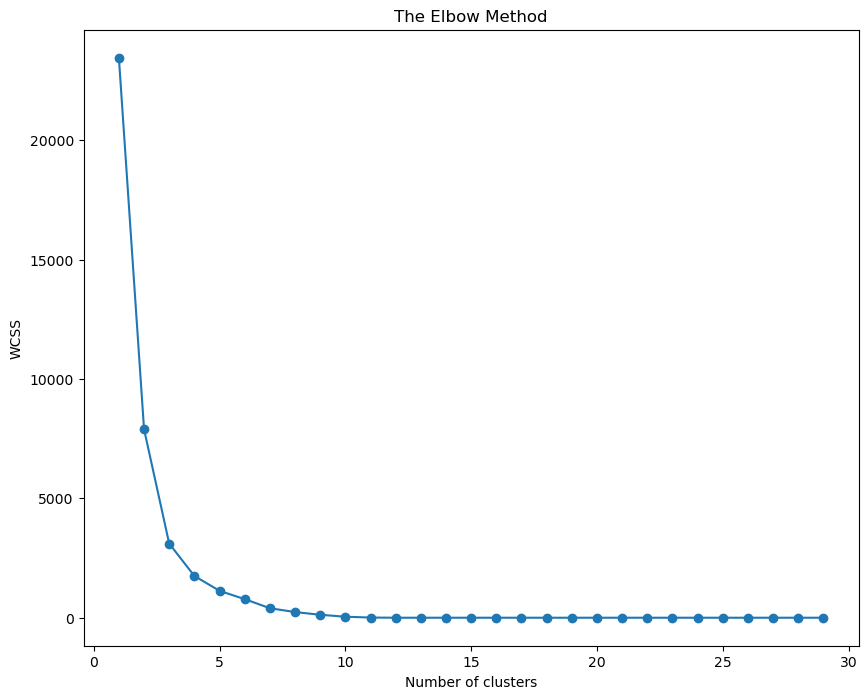

In [62]:
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pd.DataFrame(Newdata))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss,marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
#!pip install yellowbrick

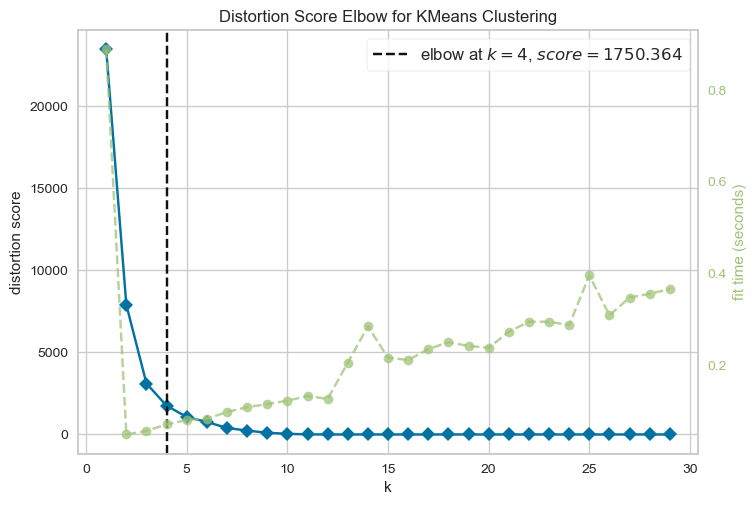

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
# install yellowbrick package
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,30)).fit(pd.DataFrame(Newdata))
visualizer.show()

In [65]:
# Fitting data using KMeans algorithm----K=4
kmeans=KMeans(n_clusters=4,init="k-means++",max_iter=100,random_state=101)
y_kmeans=kmeans.fit_predict(pd.DataFrame(Newdata))
y_kmeans

array([1, 1, 3, ..., 3, 2, 3])

In [66]:
RFMScore["Cluster"]=kmeans.labels_
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID,Segment,Cluster
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,115,cant_lose,1
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,423,Drive_Loyality,1
2,12348.0,75,4,1797.24,2,1,2,5,Gold,212,new customer,3
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,412,students,1
4,12350.0,310,1,334.40,1,1,1,3,Silver,111,new customer,0


In [67]:
RFMScore["Cluster"].value_counts()

0    1613
3    1503
1     937
2     287
Name: Cluster, dtype: int64

In [68]:
RFMScore["RFM_loyality"].value_counts()

Silver      1613
Gold        1503
Diamond     1054
Platinum     170
Name: RFM_loyality, dtype: int64

In [69]:
#Evaluating the cluster

labels=kmeans.labels_

from sklearn.metrics import silhouette_score

print(silhouette_score(pd.DataFrame(Newdata),labels))
#we find the very good silhoutte score so clustering is effective

0.6854691777739286
